## Introduction to regression with tensorflow

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.4.1


### Creating some data to view and fit the model

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Create the features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create the labels
y = np.array([3.0, 6.0, 9.0, 12.0 ,15.0, 18.0, 21.0, 24.0])

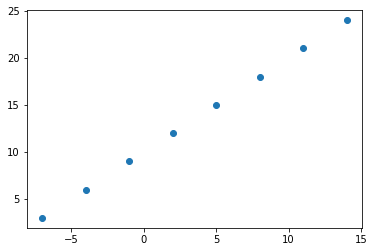

In [5]:
# Visualize the data
plt.scatter(X, y)

In [6]:
# The relation b/w X and y
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output features

In [7]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([900000])

In [8]:
# Turn any numoy arrays in tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

### Steps for modelling in tensorflow

1. **Creating the model** - define the input and output layers, as well as the hidden layers of the deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model on how to improve the patterns it is learning) and evaluation metrices (what we can use to interpret the performance of our model)
3. **Fitting the model** - letting the model trying to find pattern b/w X and y

In [9]:
# Set the seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 477ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Making a prediction on X and y
model.predict([17.0])

array([[12.716021]], dtype=float32)

### Improving the model

We can improve the model by tkaing the steps we took in the 3 steps

1. Creating the model- We can increse the number of layers, increase the number of neurons in each of those layers, changing the activation functions of each layer.
2. Compiling a model - here we might change the optimization function perhaps the learning rate of the optimization functions.
3. Fitting the model - here we can fit the model for more epochs (leave it training for longer) or on more data (give the model moere examples to learn from).

In [12]:
# rebuilding the model

# 1. Creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Complining the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['mae'])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 272ms/step - loss: 11.5953 - mae: 11.5953
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.4382 - mae: 11.4382
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2707 - mae: 11.2707
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0919 - mae: 11.0919
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9009 - mae: 10.9009
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6968 - mae: 10.6968
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4787 - mae: 10.4787
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2454 - mae: 10.2454
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 9.9959 - mae: 9.9959
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 9.7288 - mae: 9.7288
Epoch 11/100
1/1 [==============================] - 0s 5ms/st

In [13]:
# Predicting 
model.predict([17.0])

array([[30.280632]], dtype=float32)

In [14]:
# Let's see if we can make another to improve our model

# 1. Create the model with 100 hidden layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Complie the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(lr=0.01),
             metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 337ms/step - loss: 14.2261 - mae: 14.2261
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.5328 - mae: 13.5328
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 12.8450 - mae: 12.8450
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 12.1611 - mae: 12.1611
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 11.4786 - mae: 11.4786
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.7953 - mae: 10.7953
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1084 - mae: 10.1084
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 9.4153 - mae: 9.4153
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 8.7133 - mae: 8.7133
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 7.9998 - mae: 7.9998
Epoch 11/100
1/1 [==============================] - 0s 6ms/step

In [15]:
model.predict([17.0])

array([[27.13847]], dtype=float32)

The learning rate is the most important hyperparameter there is to improve the model

### Evaluating the model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it and so on
```


> When it comes to evaluation, we should visualize the data


It's a good idea to visulaize
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does the model perform while it learns?
* The prediction of the model - how does the predicitions line up against the actual truth


In [16]:
# Making a bigger data set
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [17]:
# Maing the labels
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

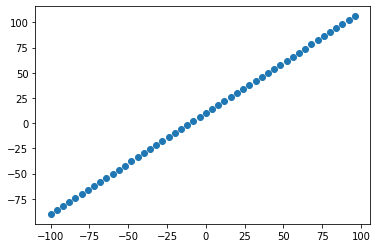

In [18]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* Training set - The model learns from this data, which is usually 70 - 80% of the data
* Validation set - the model get tuned on this data, whcih is 10-15% of the data available
* Testing set - the model get evaluated on this data on how it has learned, this is usually 10-15% of the data



In analogy of a real life example -
* The course materail(Used to prep for the exam) is the training set
* The practise exam is the validation set
* The final exam is the test set

In [19]:
# Spliting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), test_size=0.2)

In [20]:
# Shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40,), (10,), (40,), (10,))

In [21]:
# Using regualar ways to get hte data
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data
Now we've got our data, lets viz the data

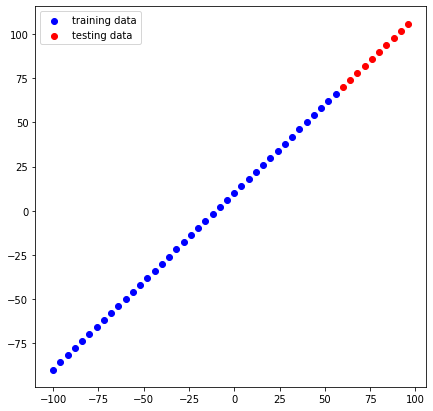

In [22]:
plt.figure(figsize=(7, 7))

plt.scatter(X_train, y_train, c="b", label="training data")

plt.scatter(X_test, y_test, c="r", label="testing data")

plt.legend();

In [23]:
# Let's see how this data works with the model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
#     tf.keras.layers.Dense(100, activation='relu')
])

# 2. Complikte the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)


In [24]:
model.summary()

ValueError: ignored

Let's build the model which builds automatically by defining the input_shape args

In [25]:
# 0. Setting the radome seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="another_model")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['mae'])

In [26]:
model.summary()

Model: "another_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - Total number of parameters in the model.
* Trainable params - These are the params (patterns) the model can update as it training
* Non trainable params - these params aren't updated during the training of the model, this is typically when you bring in the parameters from other trained models (transfer learning)


[Article for Weights and Biases](https://wandb.ai/site/articles/fundamentals-of-neural-networks)


[Learnable Parameters ("Trainable Params") In A Keras Convolutional Neural Network
](https://deeplizard.com/learn/video/8d-9SnGt5E0)


[Deep Learning Course by MIT](http://introtodeeplearning.com/)

In [27]:
# Let's fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 26.8627 - mae: 26.8627
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 24.4175 - mae: 24.4175
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 31.5187 - mae: 31.5187
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 27.8490 - mae: 27.8490
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.6465 - mae: 14.6465
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.9682 - mae: 11.9682
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.0874 - mae: 11.0874
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.3978 - mae: 11.3978
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 42.4087 - mae: 42.4087
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 28.3537 - mae: 28.3537
Epoch 11/100
2/2 [==============================] - 0s 5ms

In [28]:
# Get the models summary
model.summary()

Model: "another_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [29]:
from tensorflow.keras.utils import plot_model
# from keras.utils.vis_utils import plot_model

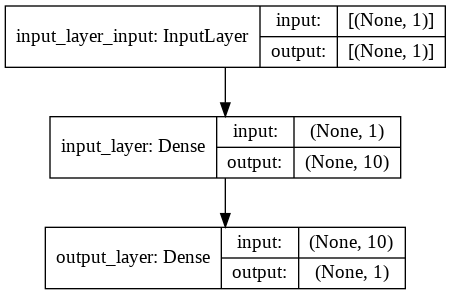

In [30]:
plot_model(model=model, show_shapes=True)

### How to visualize the model predictions


To viz the predictions it is a good idea to plot them

Often you'll see we do `y_test` or `y_true` vs `y_pred`

In [31]:
# Predicting the output
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [32]:
y_test.numpy()

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)

In [33]:
# Creating a plotting function

def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=y_pred):
  """
  Plot training data, test data and compare to ground truth
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_label, c="b", label="training data")
  plt.scatter(test_data, test_label, c="g", label="test data")
  plt.scatter(test_data, predictions, c="r", label="predictions")
  plt.legend();

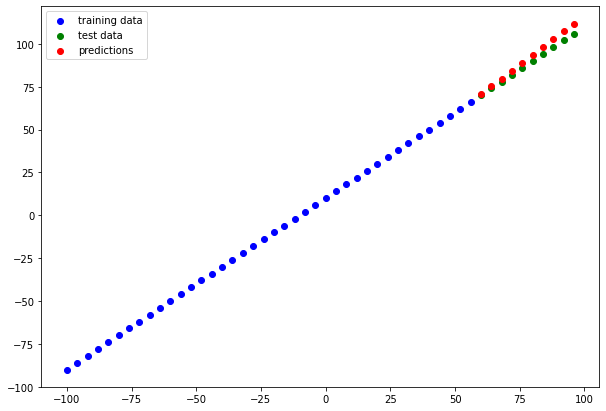

In [34]:
plot_predictions(train_data=X_train,
                 train_label=y_train,
                 test_data=X_test,
                 test_label=y_test,
                 predictions=y_pred)

### Evaluation metrices

These methods tell us in a more quantitaive way of how close our `y_test` and `y_pred` are


The evaluation is based on what kind of model we are running. 


Since we are running the regression, the two ways of metrics are 
* MAE - Average of the absolute value of the error
* MSE - Average of the squared difference of the error


In [35]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 127ms/step - loss: 3.1969 - mae: 3.1969


[3.1969451904296875, 3.1969451904296875]

In [36]:
# Calcualting the Mean Absolute Error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [37]:
# Calculating the mean squared error - This is to make the larger error more significant
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [38]:
# Function for evaluations 
def mae(y_test=y_test,
        y_pred=y_pred):
  return tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

  # Function to creat MSE evaluation
def mse(y_test=y_test,
        y_pred=y_pred):
  return tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

In [39]:
print(mae())
print(mse())

tf.Tensor(3.1969407, shape=(), dtype=float32)
tf.Tensor(13.070143, shape=(), dtype=float32)


### Improving the model


This is how we aim to achieve it
1. Get more data for the model to train on
2. Make your model larger
3. Train for longer, give the model more epochs


Let's do 3 experiments


1. `model_1` - same as the original model, 1 layer, trainded on 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained on 500 epochs


**Build `model_1`**

In [40]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [41]:
# This is the model_1
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss:

In [42]:
# Make and plots predictions for model_1
y_pred_1 = model_1.predict(X_test)
y_pred_1

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

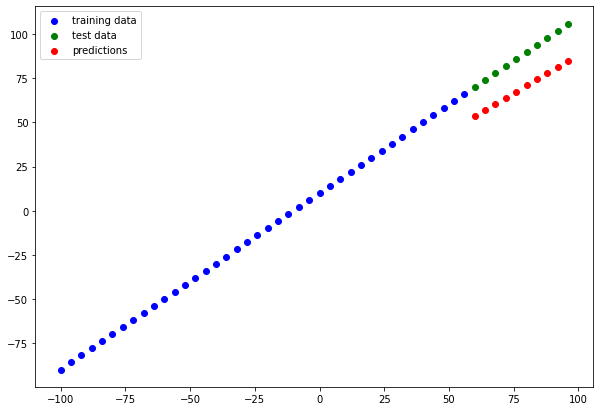

In [43]:
plot_predictions(predictions=y_pred_1)

In [44]:
# Calcuate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**

* 2 dense layers trained on 100 epochs

In [45]:
# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=200)

Epoch 1/200
2/2 [==============================] - 0s 7ms/step - loss: 77.0856 - mae: 77.0856
Epoch 2/200
2/2 [==============================] - 0s 5ms/step - loss: 17.0775 - mae: 17.0775
Epoch 3/200
2/2 [==============================] - 0s 4ms/step - loss: 20.1814 - mae: 20.1814
Epoch 4/200
2/2 [==============================] - 0s 4ms/step - loss: 12.5192 - mae: 12.5192
Epoch 5/200
2/2 [==============================] - 0s 3ms/step - loss: 14.1468 - mae: 14.1468
Epoch 6/200
2/2 [==============================] - 0s 3ms/step - loss: 11.6317 - mae: 11.6317
Epoch 7/200
2/2 [==============================] - 0s 4ms/step - loss: 12.8263 - mae: 12.8263
Epoch 8/200
2/2 [==============================] - 0s 4ms/step - loss: 11.2822 - mae: 11.2822
Epoch 9/200
2/2 [==============================] - 0s 4ms/step - loss: 41.5593 - mae: 41.5593
Epoch 10/200
2/2 [==============================] - 0s 4ms/step - loss: 27.6300 - mae: 27.6300
Epoch 11/200
2/2 [==============================] - 0s 3ms/

In [46]:
# Make and plot predictions
y_pred_2 = model_2.predict(X_test)

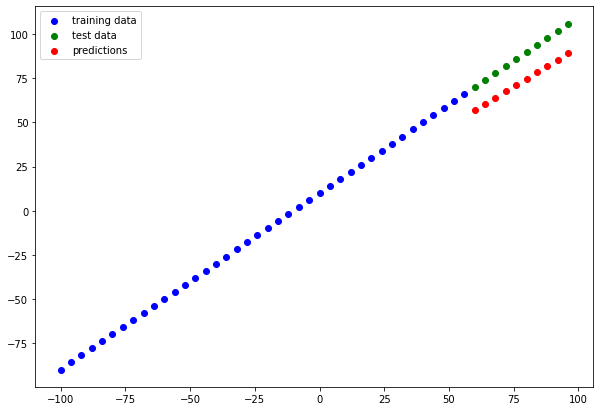

In [47]:
plot_predictions(predictions=y_pred_2)

In [48]:

mae_2 = mae(y_test, y_pred_2)
mae_2

<tf.Tensor: shape=(), dtype=float32, numpy=15.048238>

In [49]:
mse_2 = mse(y_test, y_pred_2)
mse_2

<tf.Tensor: shape=(), dtype=float32, numpy=227.8374>

**Building `model_3`**


In [50]:
tf.random.set_seed(42)

# 1. Build the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 26.8627 - mae: 26.8627
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 24.4175 - mae: 24.4175
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 31.5187 - mae: 31.5187
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 27.8490 - mae: 27.8490
Epoch 5/500
2/2 [==============================] - 0s 13ms/step - loss: 14.6465 - mae: 14.6465
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.9682 - mae: 11.9682
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 11.0874 - mae: 11.0874
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 11.3978 - mae: 11.3978
Epoch 9/500
2/2 [==============================] - 0s 11ms/step - loss: 42.4087 - mae: 42.4087
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 28.3537 - mae: 28.3537
Epoch 11/500
2/2 [==============================] - 0s 3m

In [51]:
y_preds_3 = model_3.predict(X_test)

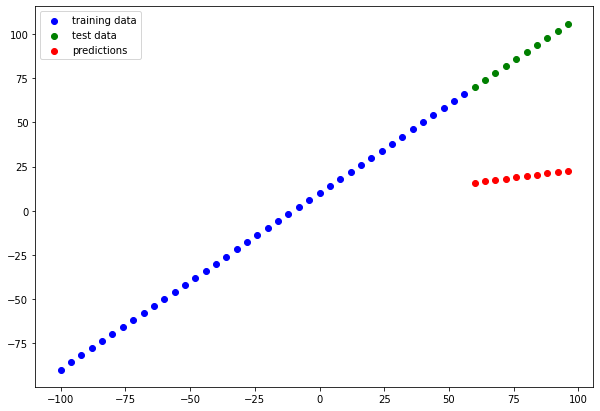

In [52]:
plot_predictions(predictions=y_preds_3)

In [53]:
# Calculate the evaluation metrics for model_3
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

### Compare the results of the experiments


In [54]:
# Let's create the pandas data frame
import pandas as pd
model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])

In [55]:
all_results 

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,15.048238,227.837402
2,model_3,68.713615,4808.027344


In [56]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Note:** The time taken between experiments must be reduced to a minimum to facilitate a maximum number of experiments in short duration of time. 

## Tracking the experiments

* Tensorboard - This is form tensorflow's library for model tracking
* Weights and Biases - A tool for trackign all of kinds of machine learngin experiments (plugs straigt into tensorflow).


### Saving our model


Saving our model allows us to use out of colab, like a web app and apps


There are 2 main formats to the model
1. The SaveModel format
2. HDF5 Format

In [57]:
# Save the model in SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [58]:
# Save the model in HDF5 format
model_2.save('best_model_HDF5.h5')

In [59]:
model_hdf5 = tf.keras.models.load_model("/content/best_model_HDF5.h5")

In [60]:
model_hdf5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [61]:
# Save from the SavedModel
model_savedmodel = tf.keras.models.load_model("/content/best_model_SavedModel_format")

In [62]:
model_savedmodel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Save the model from HDF5
model_hdf5 = tf.keras.models.load_model("/content/best_model_HDF5.h5")

In [64]:
model_hdf5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Compare the model_2 predictions with the SavedModel and the HDF5 format
model_2_preds = model_2.predict(X_test)
savedmodel_2_preds = model_savedmodel.predict(X_test)
hdf5model_2_preds = model_hdf5.predict(X_test)


In [66]:
model_2_preds == savedmodel_2_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [67]:
model_2_preds == hdf5model_2_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### Downlaod a model or any other file from Google Colab



The number of ways you can do it

1. Download from the file section of the colab section
2. Use the code to download from colab
3. You can save it to drive, and copying it to where ever we require it to 

In [68]:
# from google.colab import files
# files.download("/content/best_model_HDF5.h5")

In [69]:
# Save a file from Google Colab to Google Drive
!ls source dest

ls: cannot access 'source': No such file or directory
ls: cannot access 'dest': No such file or directory


## A larger example

In [70]:
# Import the libs

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
# Reading the dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [72]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [73]:
insurance_one_hot = pd.get_dummies(insurance)

In [74]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [75]:
# Get all the columns of the main dataframe
insurance_one_hot.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [76]:
# Create X and y values (features and labels)
y = insurance_one_hot[['charges']]
X = insurance_one_hot.drop(['charges'], axis=1)

In [77]:
# Observe all the X and y dataframe columns
X.columns, y.columns

(Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
        'smoker_yes', 'region_northeast', 'region_northwest',
        'region_southeast', 'region_southwest'],
       dtype='object'), Index(['charges'], dtype='object'))

In [78]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [79]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [80]:
# Create the training and test set
from sklearn.model_selection import train_test_split

In [81]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Get all the shapes
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1338, 11), (1338, 1), (1070, 11), (268, 11), (1070, 1), (268, 1))

In [96]:
# Set the randome seed
tf.random.set_seed(42)

# Buildng the neural network
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 10200.7270 - mae: 10200.7270
Epoch 2/100
34/34 [==============================] - 0s 942us/step - loss: 7718.1919 - mae: 7718.1919
Epoch 3/100
34/34 [==============================] - 0s 945us/step - loss: 6983.7824 - mae: 6983.7824
Epoch 4/100
34/34 [==============================] - 0s 966us/step - loss: 8083.4829 - mae: 8083.4829
Epoch 5/100
34/34 [==============================] - 0s 981us/step - loss: 7793.8446 - mae: 7793.8446
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7618.4107 - mae: 7618.4107
Epoch 7/100
34/34 [==============================] - 0s 943us/step - loss: 7678.4977 - mae: 7678.4977
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7780.4291 - mae: 7780.4291
Epoch 9/100
34/34 [==============================] - 0s 997us/step - loss: 7588.8130 - mae: 7588.8130
Epoch 10/100
34/34 [==============================] - 0s 966us/step - loss: 7520.6838 

In [97]:
# Evaluate the model with the test_data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [98]:
y_train.median(), y_train.mean()

(charges    9575.4421
 dtype: float64, charges    13346.089736
 dtype: float64)

This model seems to not be working as expected, so we need to run a few experiments


We will be doing 2

1. We will adding extra layers with more hidden units
2. Train for longer


In [108]:
# Set radom seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12353.0242 - mae: 12353.0242
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7732.2964 - mae: 7732.2964
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - mae:

In [109]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [116]:
# se random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13251.7400 - mae: 13251.7400
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 12768.7726 - mae: 12768.7726
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12248.2855 - mae: 12248.2855
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12353.0242 - mae: 12353.0242
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 11243.3972 - mae: 11243.3972
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 9718.5255 - mae: 9718.5255
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 8354.8474 - mae: 8354.8474
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7732.2964 - mae: 7732.2964
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7537.6737 - mae: 7537.6737
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 7652.7184 - mae:

In [114]:
# Evaluating the model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [117]:
# Viewing the results of the previous model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Text(0, 0.5, 'epochs')

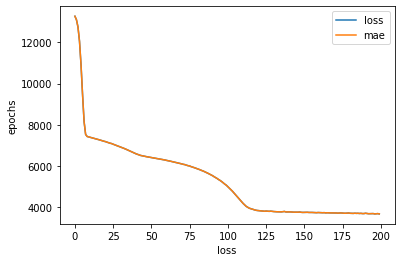

In [120]:
# Plot history (loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.xlabel("loss")
plt.ylabel("epochs")

> How long should you train for?

It depends on the model and the problem to be precise. There is a solution by tensorflow called [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping). This will stop once the metrics stops to decrease beyond a certain point.



### Preprocessing of data (normalization and standardization)



- Article: [Scale, Standardize, or Normalize with Scikit-Learn](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [126]:
# Reading the data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [128]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [137]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split

In [132]:
# Make column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [134]:
# Creating X and Y
X = insurance.drop(["charges"], axis=1)
y = insurance[["charges"]]

In [140]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
# Fit the column transformer to our training data
ct.fit(X_train)

# Transform the train data and the test data with Normalization and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [146]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

The datat is pre-processed and ready to be used in the neural network
 

In [147]:
# Set the random seed
tf.random.set_seed(42)

# 1. Creat the model
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13296.4671 - mae: 13296.4671
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 12948.4245 - mae: 12948.4245
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12705.2201 - mae: 12705.2201
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13369.7395 - mae: 13369.7395
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13230.8567 - mae: 13230.8567
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 12995.1999 - mae: 12995.1999
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12876.1059 - mae: 12876.1059
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 13004.0395 - mae: 13004.0395
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 12508.0465 - mae: 12508.0465
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12304.99

In [148]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]